# Generoidaan hydraulijärjestelmän dataa
<ul>
    <li>Ylikuormitustila (overload) tulee kun pumpun ohjaus > 80 ja paine > 80</li>
    <li>Letkurikko (hose_break) tulee kun pumpun ohjaus > 70 ja paine < 20</li>
    <li>Muut tilanteet ovat normaaleja</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Initialize lists to store data
data = []
n_samples = 10000

for _ in range(n_samples):
    # Määritellään ensin tila todennäköisyyksien perusteella
    state_rand = random.random()
    
    if state_rand < 0.20:  # 20% todennäköisyys ylikuormitukselle
        # Ylikuormitustilanne
        pump_control = int(np.random.uniform(75, 101))  # Korkea pumpun ohjaus
        base_pressure = int(pump_control * 1.1 + np.random.normal(0, 5))  # Korkea paine
        pressure = max(80, min(100, base_pressure))  # Varmistetaan että paine on korkea
        state = "overload"
        
    elif state_rand < 0.25:  # 5% todennäköisyys letkurikolle
        # Letkurikkotilanne
        pump_control = int(np.random.uniform(70, 101))  # Korkea pumpun ohjaus
        pressure = int(np.random.uniform(0, 20))  # Matala paine
        state = "hose_break"
        
    else:  # 75% todennäköisyys normaalille toiminnalle
        # Normaalitilanne
        pump_control = int(np.random.uniform(0, 101))
        base_pressure = int(pump_control * 0.9 + np.random.normal(0, 10))
        pressure = max(0, min(100, base_pressure))
        state = "normal"
    
    # Add row to data
    data.append({
        "pumpControl": pump_control,
        "pressure": pressure,
        "state": state
    })

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
print("\nGeneroitu data on tallennettu hydraulic_data.csv:")
df.to_csv("hydraulic_data.csv", index=False)

# Print some statistics
print("\nData Statistics:")
print(f"Total samples: {len(df)}")
print("\nState distribution:")
print(df['state'].value_counts())
print("\nSample of the data:")
print(df.head())


Generoitu data on tallennettu hydraulic_data.csv:

Data Statistics:
Total samples: 10000

State distribution:
state
normal        7509
overload      1958
hose_break     533
Name: count, dtype: int64

Sample of the data:
   pumpControl  pressure       state
0           37        22      normal
1           79        88    overload
2           76        84    overload
3           91         0  hose_break
4           97        97      normal


# Visualisoidaan generoitu data


Tilastot tiloittain:

Lukumäärät ja prosenttiosuudet:
normal: 7509 kpl (75.1%)
overload: 1958 kpl (19.6%)
hose_break: 533 kpl (5.3%)

Pumpun ohjauksen tilastot:
             count       mean        std   min   25%   50%   75%    max
state                                                                  
hose_break   533.0  85.273921   8.755880  70.0  78.0  85.0  93.0  100.0
normal      7509.0  49.734585  29.378412   0.0  24.0  50.0  75.0  100.0
overload    1958.0  87.427988   7.525917  75.0  81.0  87.5  94.0  100.0

Paineen tilastot:
             count       mean        std   min   25%   50%    75%    max
state                                                                   
hose_break   533.0   9.793621   5.780980   0.0   5.0  10.0   15.0   19.0
normal      7509.0  44.564256  27.628998   0.0  21.0  44.0   67.0  100.0
overload    1958.0  93.528090   6.775695  80.0  88.0  96.0  100.0  100.0


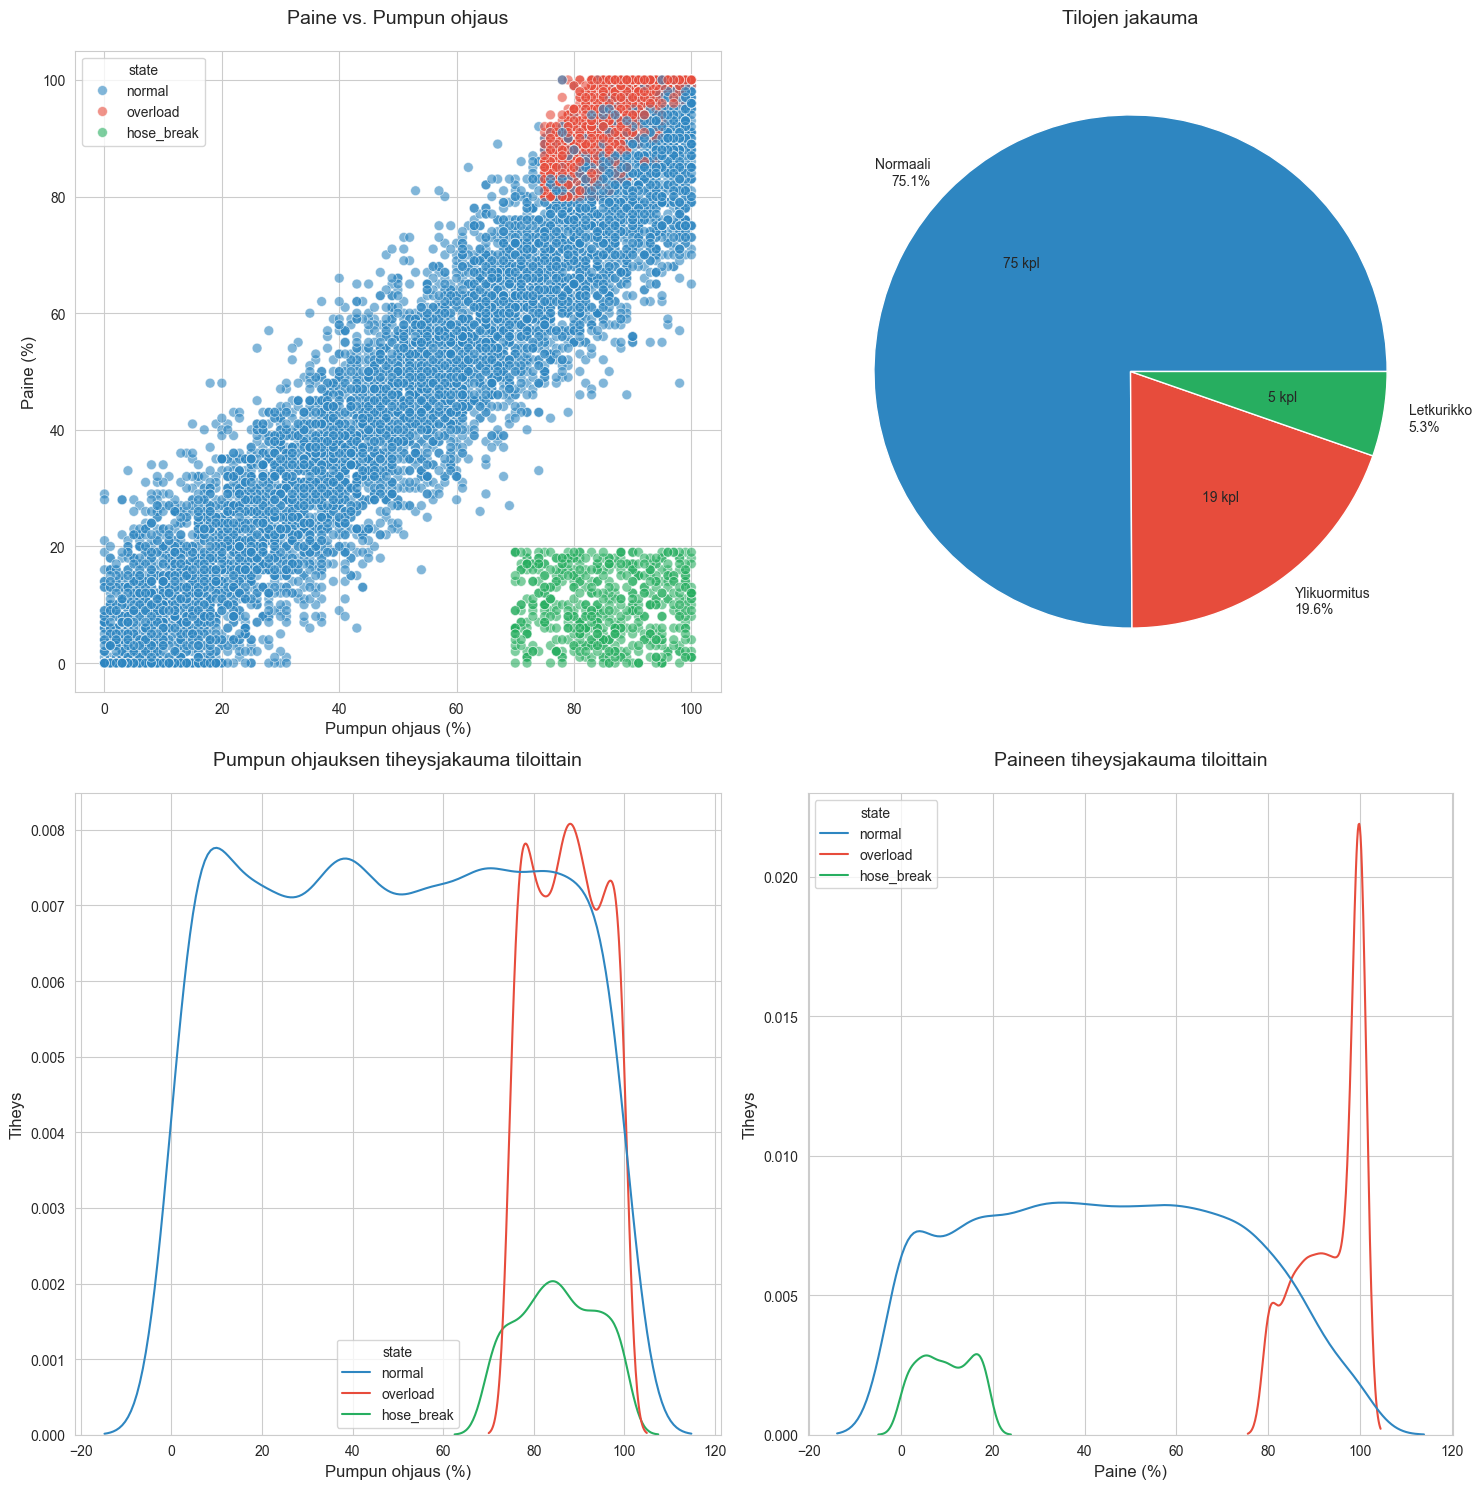

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Luetaan data
df = pd.read_csv('hydraulic_data.csv')

# Asetetaan kuvaajien tyyli
sns.set_style("whitegrid")
sns.set_palette("deep")

# Luodaan 2x2 kuvaajat
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# 1. Scatter plot (ylävasen)
sns.scatterplot(data=df, x='pumpControl', y='pressure', hue='state', 
                palette={'normal': '#2E86C1', 'overload': '#E74C3C', 'hose_break': '#27AE60'},
                alpha=0.6, s=50, ax=axes[0,0])
axes[0,0].set_title('Paine vs. Pumpun ohjaus', pad=20, fontsize=14)
axes[0,0].set_xlabel('Pumpun ohjaus (%)', fontsize=12)
axes[0,0].set_ylabel('Paine (%)', fontsize=12)

# 2. Pie plot (yläoikea)
counts = df['state'].value_counts()
axes[0,1].pie([counts['normal'], counts['overload'], counts['hose_break']], 
              labels=[f'Normaali\n{100*counts["normal"]/len(df):.1f}%', 
                      f'Ylikuormitus\n{100*counts["overload"]/len(df):.1f}%', 
                      f'Letkurikko\n{100*counts["hose_break"]/len(df):.1f}%'],
              colors=['#2E86C1', '#E74C3C', '#27AE60'],
              autopct='%d kpl')
axes[0,1].set_title('Tilojen jakauma', pad=20, fontsize=14)

# 3. Pumpun ohjauksen tiheysjakauma (alavasen)
sns.kdeplot(data=df, x='pumpControl', hue='state', 
            palette={'normal': '#2E86C1', 'overload': '#E74C3C', 'hose_break': '#27AE60'},
            ax=axes[1,0])
axes[1,0].set_title('Pumpun ohjauksen tiheysjakauma tiloittain', pad=20, fontsize=14)
axes[1,0].set_xlabel('Pumpun ohjaus (%)', fontsize=12)
axes[1,0].set_ylabel('Tiheys', fontsize=12)

# 4. Paineen tiheysjakauma (alaoikea)
sns.kdeplot(data=df, x='pressure', hue='state',
            palette={'normal': '#2E86C1', 'overload': '#E74C3C', 'hose_break': '#27AE60'},
            ax=axes[1,1])
axes[1,1].set_title('Paineen tiheysjakauma tiloittain', pad=20, fontsize=14)
axes[1,1].set_xlabel('Paine (%)', fontsize=12)
axes[1,1].set_ylabel('Tiheys', fontsize=12)

# Säädetään asettelua
plt.tight_layout()

# Tulostetaan tilastot
print("\nTilastot tiloittain:")
print("\nLukumäärät ja prosenttiosuudet:")
for state in counts.index:
    count = counts[state]
    pct = (count / len(df)) * 100
    print(f"{state}: {count} kpl ({pct:.1f}%)")

print("\nPumpun ohjauksen tilastot:")
print(df.groupby('state')['pumpControl'].describe())

print("\nPaineen tilastot:")
print(df.groupby('state')['pressure'].describe())